<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)



<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Customer Churn Prediction for a Telecom Company</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

## <a id='toc1_1_'></a>[Dataset:](#toc0_)
    
Telecom Churn Prediction Dataset
- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, payment method, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, and evaluation.
- Relevance: A synthetic dataset for customer relationship management scenarios.

**Note:**
- This is a Classification Task

**Table of contents**<a id='toc0_'></a>    
   
  - [Step-01 Load Libraries](#toc1_2_)    
  - [Step-02 Load Dataset](#toc1_3_)    
  - [Step-03 Data Preprocessing](#toc1_4_)    
  - [Step-04: Data Visualization](#toc1_5_)    
    - [Correlation Matrix Heatmap](#toc1_5_1_)    
    - [Correlation of "Churn" with other variables](#toc1_5_2_)    
    - [Gender Distribution](#toc1_5_3_)    
    - [Churn Distribution](#toc1_5_4_)    
    - [Contract Type Distribution](#toc1_5_5_)    
    - [Payment Method vs Churn](#toc1_5_6_)    
    - [Tenure vs Churn (Boxplot)](#toc1_5_7_)    
    - [Monthly Charges vs Churn (Boxplot)](#toc1_5_8_)    
  - [Step-06 Split the dataset into Training and Testing](#toc1_6_)    
  - [Step-05 Model Selection](#toc1_7_)    
    - [(i) Apply Logistic Regression](#toc1_7_1_)    
    - [(ii) Apply XG Boost](#toc1_7_2_)    
    - [(iii) Apply XG Boost with Optuna](#toc1_7_3_)    
    - [(iv) Apply Random Forest](#toc1_7_4_)    
  - [Step-07 Model Prediction](#toc1_8_)    
  - [Step-08 Save and Load Model](#toc1_9_)    
  - [Step-09 Model Evaluation](#toc1_10_)    
      - [**Evaluation Matrix for Logistic Regression**](#toc1_10_1_1_)    
      - [**Evaluation Matrix for XGBoost**](#toc1_10_1_2_)    
      - [**Evaluation Matrix for XGBoost with Optuna**](#toc1_10_1_3_)    
      - [**Evaluation with Random Forest Classifier**](#toc1_10_1_4_)    
      - [**Evaluation with Support Vector Classifier**](#toc1_10_1_5_)    
  - [Step-10: ROC Curve  ](#toc1_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Step-01 Load Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, StratifiedKFold ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.ticker as mtick # For specifying the axes tick format 

from xgboost import XGBClassifier
from sklearn.svm import SVC

import optuna
import joblib

import warnings
warnings.filterwarnings("ignore")

## <a id='toc1_3_'></a>[Step-02 Load Dataset](#toc0_)

In [3]:
np.random.seed(42)

n = 10000

data = pd.DataFrame({

  'CustomerID': np.arange(n),

  'Gender': np.random.choice(['Male', 'Female'], size=n),

  'SeniorCitizen': np.random.choice([0, 1], size=n),

  'Tenure': np.random.randint(1, 72, size=n),

  'MonthlyCharges': np.round(np.random.uniform(20, 120, size=n), 2),

  'TotalCharges': lambda df: df['Tenure'] * df['MonthlyCharges'],

  'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),

  'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], size=n),

  'Churn': np.random.choice([0, 1], size=n, p=[0.73, 0.27])

})

data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)



In [ ]:
df = data.copy()
display(df.head())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,0,Male,0,55,111.88,6153.40,Two year,Mailed check,0
1,1,Female,1,36,58.70,2113.20,Two year,Electronic check,0
2,2,Male,0,37,118.86,4397.82,One year,Electronic check,0
3,3,Male,1,14,96.14,1345.96,Month-to-month,Mailed check,1
4,4,Male,1,27,28.05,757.35,Two year,Mailed check,0


Number of rows: 10000
Number of columns: 9


## <a id='toc1_4_'></a>[Step-03 Data Preprocessing](#toc0_)

* **Let's check information about dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10000 non-null  int32  
 1   Gender          10000 non-null  object 
 2   SeniorCitizen   10000 non-null  int32  
 3   Tenure          10000 non-null  int32  
 4   MonthlyCharges  10000 non-null  float64
 5   TotalCharges    10000 non-null  float64
 6   Contract        10000 non-null  object 
 7   PaymentMethod   10000 non-null  object 
 8   Churn           10000 non-null  int32  
dtypes: float64(2), int32(4), object(3)
memory usage: 547.0+ KB


* **Let's check Null values in dataset**

In [6]:
df.isnull().sum()/len(df)*100

CustomerID        0.0
Gender            0.0
SeniorCitizen     0.0
Tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
Contract          0.0
PaymentMethod     0.0
Churn             0.0
dtype: float64

* **Let's drop CustomerID, its not beneficial for us**

In [7]:
df.drop("CustomerID", axis = 1, inplace = True)

In [8]:
df.head()

,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,Male,0,55,111.88,6153.40,Two year,Mailed check,0
1,Female,1,36,58.70,2113.20,Two year,Electronic check,0
2,Male,0,37,118.86,4397.82,One year,Electronic check,0
3,Male,1,14,96.14,1345.96,Month-to-month,Mailed check,1
4,Male,1,27,28.05,757.35,Two year,Mailed check,0


* **Let's check correlation of all Numeric Features**

In [80]:
df.corr(numeric_only=True)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.008016,0.006265,0.012168,0.004462
Tenure,0.008016,1.000000,0.014735,0.771982,0.008911
MonthlyCharges,0.006265,0.014735,1.000000,0.562342,0.003537
TotalCharges,0.012168,0.771982,0.562342,1.000000,0.008614
Churn,0.004462,0.008911,0.003537,0.008614,1.000000


* **Let's do One Hot Encoding**
 
   - labels are already encode, so we will not perform Label Encoding

In [9]:

df_encoded = pd.get_dummies(df, columns = ['Gender','Contract','PaymentMethod'])
df_encoded.head()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,55,111.88,6153.40,0,False,True,False,False,True,False,False,False,True
1,1,36,58.70,2113.20,0,True,False,False,False,True,False,False,True,False
2,0,37,118.86,4397.82,0,False,True,False,True,False,False,False,True,False
3,1,14,96.14,1345.96,1,False,True,True,False,False,False,False,False,True
4,1,27,28.05,757.35,0,False,True,False,False,True,False,False,False,True


In [ ]:
df_encoded.shape

(10000, 14)

* **Let's check correlation after encoding categorical features**

In [ ]:
df_corr = df_encoded.corr(numeric_only=True)
df_corr

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.008016,0.006265,0.012168,0.004462,-0.006004,0.006004,-0.001390,0.002069,-0.000710,-0.001036,-0.001043,-0.009789,0.011914
Tenure,0.008016,1.000000,0.014735,0.771982,0.008911,-0.005947,0.005947,0.027906,-0.010017,-0.017563,0.003802,-0.000100,-0.006034,0.002346
MonthlyCharges,0.006265,0.014735,1.000000,0.562342,0.003537,0.017598,-0.017598,-0.011762,-0.012323,0.024102,-0.015114,0.008379,0.002021,0.004744
TotalCharges,0.012168,0.771982,0.562342,1.000000,0.008614,0.005826,-0.005826,0.016435,-0.013268,-0.002906,-0.006871,0.004232,-0.005558,0.008238
Churn,0.004462,0.008911,0.003537,0.008614,1.000000,-0.000691,0.000691,-0.006519,0.007375,-0.000980,0.001233,0.005036,-0.000402,-0.005874
Gender_Female,-0.006004,-0.005947,0.017598,0.005826,-0.000691,1.000000,-1.000000,-0.002703,0.013455,-0.010900,-0.004955,0.009358,-0.006328,0.001958
Gender_Male,0.006004,0.005947,-0.017598,-0.005826,0.000691,-1.000000,1.000000,0.002703,-0.013455,0.010900,0.004955,-0.009358,0.006328,-0.001958
Contract_Month-to-month,-0.001390,0.027906,-0.011762,0.016435,-0.006519,-0.002703,0.002703,1.000000,-0.500591,-0.486387,0.001321,0.010800,-0.019188,0.007133
Contract_One year,0.002069,-0.010017,-0.012323,-0.013268,0.007375,0.013455,-0.013455,-0.500591,1.000000,-0.512905,0.003632,-0.013120,0.007619,0.001839
Contract_Two year,-0.000710,-0.017563,0.024102,-0.002906,-0.000980,-0.010900,0.010900,-0.486387,-0.512905,1.000000,-0.004975,0.002532,0.011337,-0.008930


## <a id='toc1_5_'></a>[Step-04: Data Visualization](#toc0_)

### <a id='toc1_5_1_'></a>[Correlation Matrix Heatmap](#toc0_)

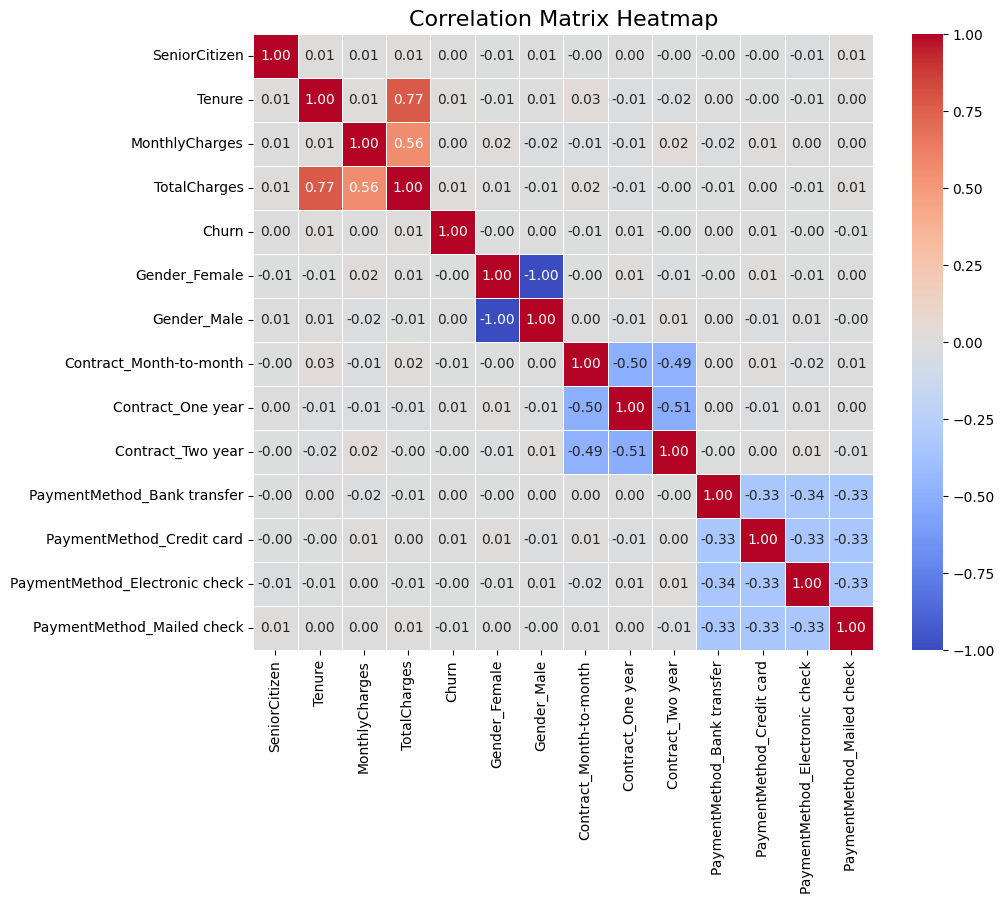

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

### <a id='toc1_5_2_'></a>[Correlation of "Churn" with other variables](#toc0_)

<Axes: >

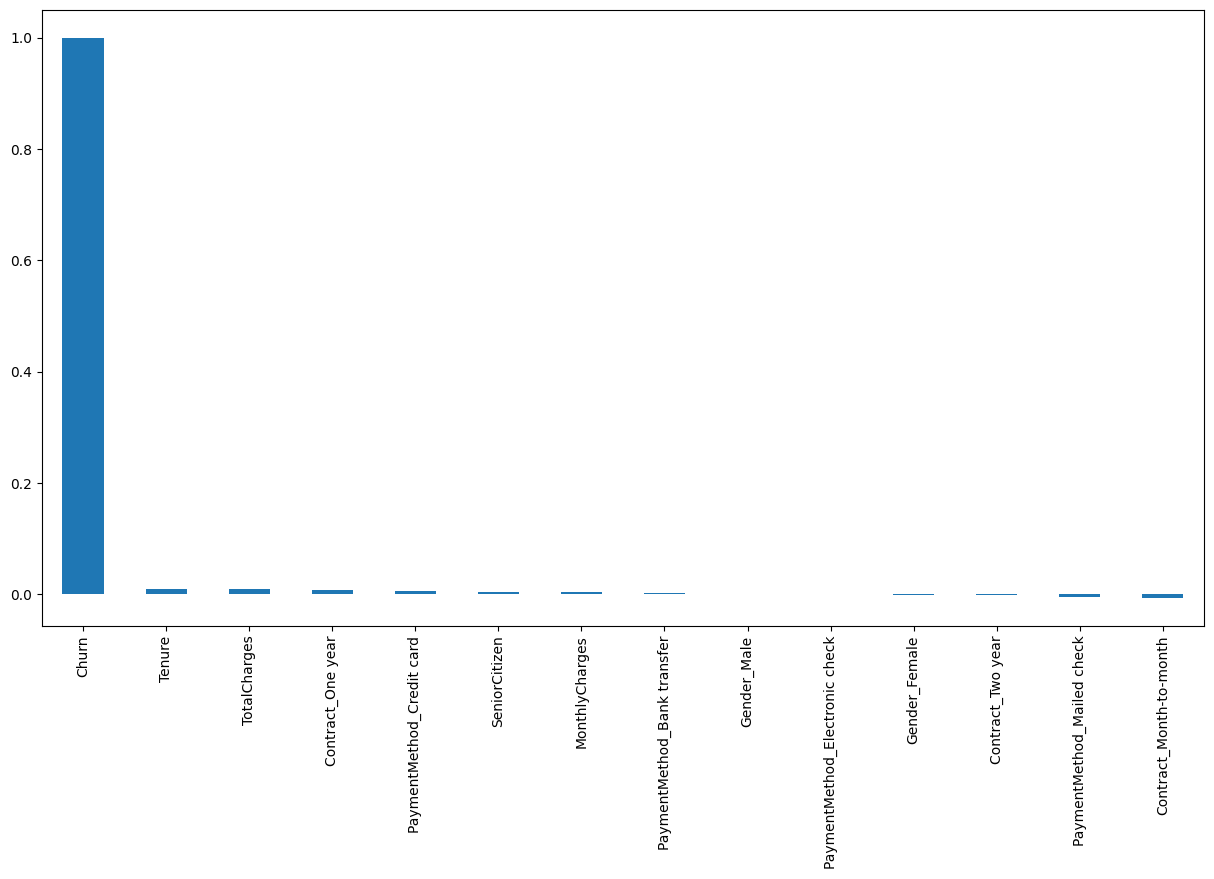

In [ ]:
# Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))
df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### <a id='toc1_5_3_'></a>[Gender Distribution](#toc0_)

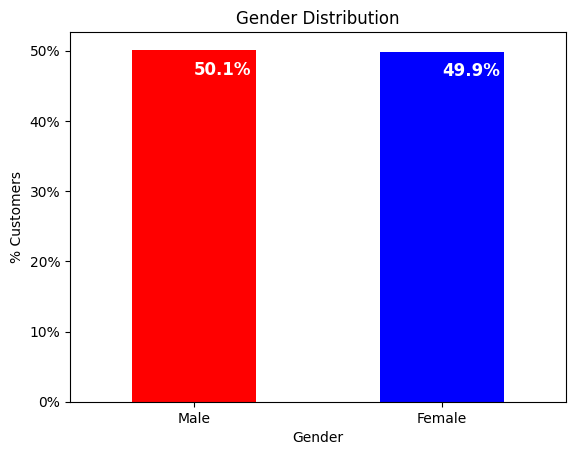

In [ ]:
colors = ['red', 'blue']
gender_counts = df['Gender'].value_counts()
ax = (gender_counts * 100.0 / len(df_encoded)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Iterate over the bar heights and add labels to the bars
total = gender_counts.sum()
for bar, count in zip(ax.patches, gender_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',
            fontsize=12,
            color='white',
            weight='bold'
           )

plt.show()

### <a id='toc1_5_4_'></a>[Churn Distribution](#toc0_)

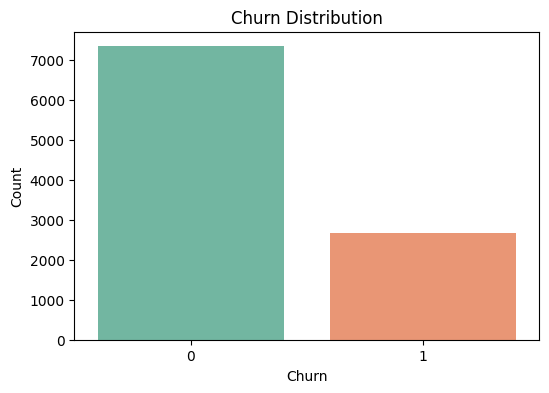

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### <a id='toc1_5_5_'></a>[Contract Type Distribution](#toc0_)

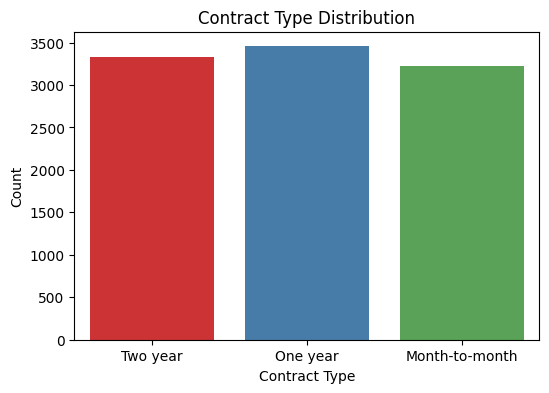

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', palette='Set1')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


### <a id='toc1_5_6_'></a>[Payment Method vs Churn](#toc0_)

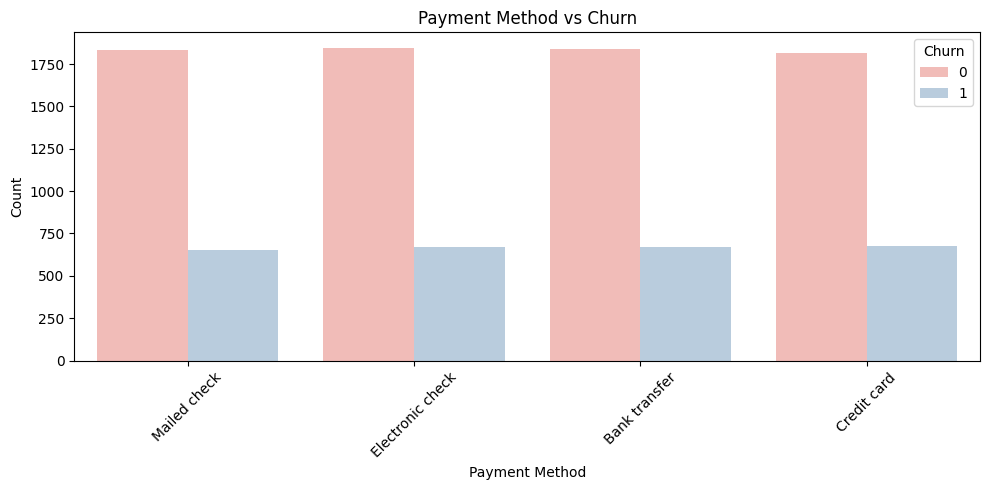

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Pastel1')
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### <a id='toc1_5_7_'></a>[Tenure vs Churn (Boxplot)](#toc0_)

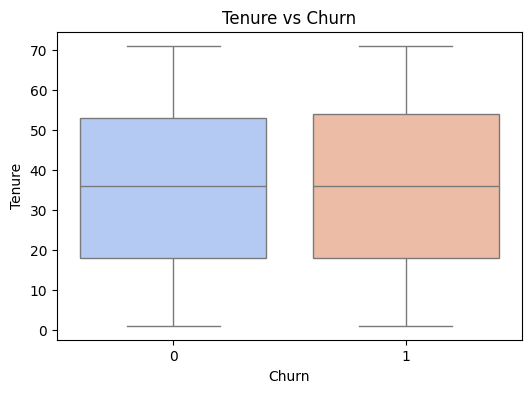

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='Tenure', palette='coolwarm')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


### <a id='toc1_5_8_'></a>[Monthly Charges vs Churn (Boxplot)](#toc0_)

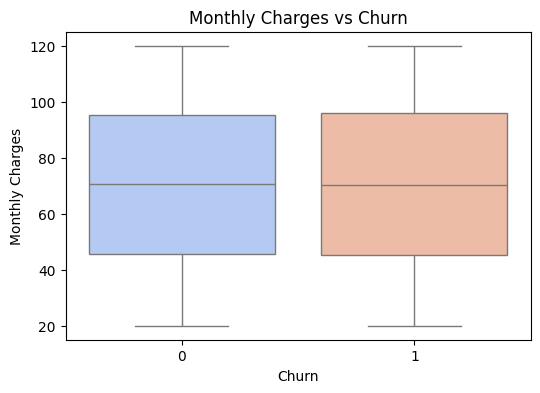

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


## <a id='toc1_6_'></a>[Step-06 Split the dataset into Training and Testing](#toc0_)

In [ ]:
X = df_encoded.drop('Churn', axis = 1)
y = df_encoded['Churn']

X_train, X_test , y_train , y_test  = train_test_split(X, y , test_size = 0.2 , random_state = 42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

## <a id='toc1_7_'></a>[Step-05 Model Selection](#toc0_)

### <a id='toc1_7_1_'></a>[(i) Apply Logistic Regression](#toc0_)

In [ ]:
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)

### <a id='toc1_7_2_'></a>[(ii) Apply XG Boost](#toc0_)

In [ ]:
xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### <a id='toc1_7_3_'></a>[(iii) Apply XG Boost with Optuna](#toc0_)

In [36]:
# Step 1 : Define Objective Function

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'use_label_encoder': False,
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }

    model_xgboost_optuna = XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=5 , shuffle=True , random_state = 42)

    scores = cross_val_score(model_xgboost_optuna, X_train, y_train, scoring = 'accuracy' , cv = skf)

    return scores.mean()

In [37]:
# step 2: Run Optimization
study = optuna.create_study(direction = 'maximize')
study.optimize(objective , n_trials = 50)

[I 2025-06-24 08:36:01,181] A new study created in memory with name: no-name-d16a2401-5b69-4c03-8e86-bc903c327157
[I 2025-06-24 08:36:03,658] Trial 0 finished with value: 0.7321250000000001 and parameters: {'max_depth': 12, 'learning_rate': 0.09886326567581917, 'n_estimators': 268, 'gamma': 1.6260804221459602, 'min_child_weight': 3, 'subsample': 0.591293239642561, 'colsample_bytree': 0.8573825341147474, 'reg_alpha': 4.225562107668251, 'reg_lambda': 2.471570087307508}. Best is trial 0 with value: 0.7321250000000001.
[I 2025-06-24 08:36:09,705] Trial 1 finished with value: 0.730375 and parameters: {'max_depth': 8, 'learning_rate': 0.1326490610375761, 'n_estimators': 624, 'gamma': 1.5216503551752165, 'min_child_weight': 3, 'subsample': 0.8323269890551637, 'colsample_bytree': 0.7002966010750518, 'reg_alpha': 0.9684563965506265, 'reg_lambda': 1.1153090191860477}. Best is trial 0 with value: 0.7321250000000001.
[I 2025-06-24 08:36:15,949] Trial 2 finished with value: 0.7187499999999999 and p

In [ ]:
# Step 3: Train Final Model with best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

model_xgboost_optuna = XGBClassifier(**best_params)
model_xgboost_optuna.fit(X_train , y_train) 

Best Parameters: {'max_depth': 9, 'learning_rate': 0.0860172028810596, 'n_estimators': 261, 'gamma': 4.0748562445153915, 'min_child_weight': 5, 'subsample': 0.9365194180845771, 'colsample_bytree': 0.9997945072095886, 'reg_alpha': 1.3198267147953258, 'reg_lambda': 4.966644364270188}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9997945072095886, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.0748562445153915,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0860172028810596,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=261, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### <a id='toc1_7_4_'></a>[(iv) Apply Random Forest](#toc0_)

In [47]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

* **Apply SVM - Support Vector Machine**

In [ ]:
model_svc = SVC()
model_svc.fit(X_train , y_train)

SVC()

## <a id='toc1_8_'></a>[Step-07 Model Prediction](#toc0_)

In [ ]:
y_pred_lr = model_lr.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb_optuna = model_xgboost_optuna.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

y_proba_lr = model_lr.predict_proba(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)
y_proba_xgb_optuna = model_xgboost_optuna.predict_proba(X_test)
y_proba_rf = model_rf.predict_proba(X_test)
#y_proba_svc = model_svc.predict_log_proba(X_test)

## <a id='toc1_9_'></a>[Step-08 Save and Load Model](#toc0_)

In [41]:
joblib.dump(model_xgboost_optuna, 'xgboost_model_optuna.pkl')

['xgboost_model_optuna.pkl']

In [ ]:
joblib.load('xgboost_model_optuna.pkl')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9997945072095886, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=4.0748562445153915,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0860172028810596,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=261, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## <a id='toc1_10_'></a>[Step-09 Model Evaluation](#toc0_)

#### <a id='toc1_10_1_1_'></a>[**Evaluation Matrix for Logistic Regression**](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy: .2f}")

auc = roc_auc_score(y_test,y_pred_lr)
print(f"AUC-ROC of Logistic Regression: {AUC_ROC: .2f}")

cf_lr = confusion_matrix(y_test,y_pred_lr)
print(f"Confusion Matrix: \n {cf_lr}")

cr = classification_report(y_test,y_pred_lr)
print(f"Classification Report: \n {cr}")

Accuracy of Logistic Regression:  0.74
AUC-ROC of Logistic Regression:  0.50
Confusion Matrix: 
 [[1472    0]
 [ 528    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1472
           1       0.00      0.00      0.00       528

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.54      0.74      0.62      2000



#### <a id='toc1_10_1_2_'></a>[**Evaluation Matrix for XGBoost**](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy of XG Boost Classifier: {accuracy: .2f}")

AUC_ROC = roc_auc_score(y_test,y_pred_xgb)
print(f"AUC-ROC of XG Boost Classifier: {AUC_ROC: .2f}")

cf_lr = confusion_matrix(y_test,y_pred_xgb)
print(f"Confusion Matrix: \n {cf_lr}")

cr = classification_report(y_test,y_pred_xgb)
print(f"Classification Report: \n {cr}")

Accuracy of XG Boost Classifier:  0.71
AUC-ROC of XG Boost Classifier:  0.50
Confusion Matrix: 
 [[1386   86]
 [ 497   31]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      1472
           1       0.26      0.06      0.10       528

    accuracy                           0.71      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.61      0.71      0.63      2000



#### <a id='toc1_10_1_3_'></a>[**Evaluation Matrix for XGBoost with Optuna**](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_xgb_optuna)
print(f"Accuracy of XG Boost Classifier with Optuna: {accuracy: .2f}")

AUC_ROC = roc_auc_score(y_test,y_pred_xgb_optuna)
print(f"AUC-ROC of XG Boost Classifier with Optuna: {AUC_ROC: .2f}")

cf_lr = confusion_matrix(y_test,y_pred_xgb_optuna)
print(f"Confusion Matrix: \n {cf_lr}")

cr = classification_report(y_test,y_pred_xgb_optuna)
print(f"Classification Report: \n {cr}")

Accuracy of XG Boost Classifier with Optuna:  0.74
AUC-ROC of XG Boost Classifier with Optuna:  0.50
Confusion Matrix: 
 [[1472    0]
 [ 528    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1472
           1       0.00      0.00      0.00       528

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.54      0.74      0.62      2000



#### <a id='toc1_10_1_4_'></a>[**Evaluation with Random Forest Classifier**](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy: .2f}")

AUC_ROC = roc_auc_score(y_test,y_pred_rf)
print(f"AUC-ROC of Random Forest Classifier: {AUC_ROC: .2f}")

cf_lr = confusion_matrix(y_test,y_pred_rf)
print(f"Confusion Matrix: \n {cf_lr}")

cr = classification_report(y_test,y_pred_rf)
print(f"Classification Report: \n {cr}")

Accuracy of Random Forest Classifier:  0.68
AUC-ROC of Random Forest Classifier:  0.50
Confusion Matrix: 
 [[1301  171]
 [ 462   66]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.88      0.80      1472
           1       0.28      0.12      0.17       528

    accuracy                           0.68      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.62      0.68      0.64      2000



#### <a id='toc1_10_1_5_'></a>[**Evaluation with Support Vector Classifier**](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_svc)
print(f"Accuracy of Support Vector Classifier: {accuracy: .2f}")

AUC_ROC = roc_auc_score(y_test,y_pred_svc)
print(f"AUC-ROC of Support Vector Classifier: {AUC_ROC: .2f}")


cf_svc = confusion_matrix(y_test,y_pred_svc)
print(f"Confusion Matrix: \n {cf_svc}")

cr = classification_report(y_test,y_pred_svc)
print(f"Classification Report: \n {cr}")

Accuracy of Support Vector Classifier:  0.74
AUC-ROC of Support Vector Classifier:  0.50
Confusion Matrix: 
 [[1472    0]
 [ 528    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1472
           1       0.00      0.00      0.00       528

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.54      0.74      0.62      2000



## <a id='toc1_11_'></a>[Step-10: ROC Curve  ](#toc0_)

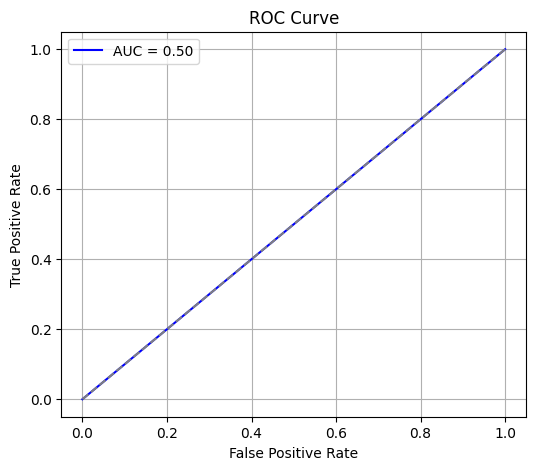

In [63]:
# ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_optuna)

# Plot the ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test,y_pred_xgb_optuna):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thankyou</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>